# Correlation analysis across preprocessing tools

**Requires**

Generated by `alevin_coll_decoy_gtr_vi.ipynb`
* `DATA_DIR/dentategyrus/velocities/alevin_coll_decoy_gtr_velovi.npy`

Generated by `alevin_coll_decoy_gtr_em_ss.ipynb`
* `DATA_DIR/dentategyrus/velocities/alevin_coll_decoy_gtr_em.pickle`
* `DATA_DIR/dentategyrus/velocities/alevin_coll_decoy_gtr_steady_state.pickle`

Generated by `alevin_coll_gtr_vi.ipynb`
* `DATA_DIR/dentategyrus/velocities/alevin_coll_gtr_velovi.npy`

Generated by `alevin_coll_gtr_em_ss.ipynb`
* `DATA_DIR/dentategyrus/velocities/alevin_coll_gtr_em.pickle`
* `DATA_DIR/dentategyrus/velocities/alevin_coll_gtr_steady_state.pickle`

Generated by `alevin_sep_decoy_gtr_vi.ipynb`
* `DATA_DIR/dentategyrus/velocities/alevin_sep_decoy_gtr_velovi.npy`

Generated by `alevin_sep_decoy_gtr_em_ss.ipynb`
* `DATA_DIR/dentategyrus/velocities/alevin_sep_decoy_gtr_em.pickle`
* `DATA_DIR/dentategyrus/velocities/alevin_sep_decoy_gtr_steady_state.pickle`

Generated by `alevin_sep_gtr_vi.ipynb`
* `DATA_DIR/dentategyrus/velocities/alevin_sep_gtr_velovi.npy`

Generated by `alevin_sep_gtr_em_ss.ipynb`
* `DATA_DIR/dentategyrus/velocities/alevin_sep_gtr_em.pickle`
* `DATA_DIR/dentategyrus/velocities/alevin_sep_gtr_steady_state.pickle`

Generated by `alevin_spliced_unspliced_gtr_vi.ipynb`
* `DATA_DIR/dentategyrus/velocities/alevin_spliced_unspliced_velovi.npy`

Generated by `alevin_spliced_unspliced_gtr_em_ss.ipynb`
* `DATA_DIR/dentategyrus/velocities/alevin_spliced_unspliced_em.pickle`
* `DATA_DIR/dentategyrus/velocities/alevin_spliced_unspliced_steady_state.pickle`

Generated by `kallisto_dropest_vi.ipynb`
* `DATA_DIR/dentategyrus/velocities/dropest_velovi.npy`

Generated by `kallisto_dropest_em_ss.ipynb`
* `DATA_DIR/dentategyrus/velocities/dropest_em.pickle`
* `DATA_DIR/dentategyrus/velocities/dropest_steady_state.pickle`

Generated by `isocollapse_exclude_vi.ipynb`
* `DATA_DIR/dentategyrus/velocities/kallisto_isocollapse_exclude_velovi.npy`

Generated by `isocollapse_exclude_em_ss.ipynb`
* `DATA_DIR/dentategyrus/velocities/kallisto_isocollapse_exclude_em.pickle`
* `DATA_DIR/dentategyrus/velocities/kallisto_isocollapse_exclude_steady_state.pickle`

Generated by `kallisto_isocollapse_include_vi.ipynb`
* `DATA_DIR/dentategyrus/velocities/kallisto_isocollapse_include_velovi.npy`

Generated by `kallisto_isocollapse_include_em_ss.ipynb`
* `DATA_DIR/dentategyrus/velocities/kallisto_isocollapse_include_em.pickle`
* `DATA_DIR/dentategyrus/velocities/kallisto_isocollapse_include_steady_state.pickle`

Generated by `kallisto_isoseparate_exclude_vi.ipynb`
* `DATA_DIR/dentategyrus/velocities/kallisto_isoseparate_exclude_velovi.npy`

Generated by `kallisto_isoseparate_exclude_em_ss.ipynb`
* `DATA_DIR/dentategyrus/velocities/kallisto_isoseparate_exclude_em.pickle`
* `DATA_DIR/dentategyrus/velocities/kallisto_isoseparate_exclude_steady_state.pickle`

Generated by `starsolo_subtr_vi.ipynb`
* `DATA_DIR/dentategyrus/velocities/starsolo_subtr_velovi.npy`

Generated by `starsolo_subtr_em_ss.ipynb`
* `DATA_DIR/dentategyrus/velocities/starsolo_subtr_em.pickle`
* `DATA_DIR/dentategyrus/velocities/starsolo_subtr_steady_state.pickle`

Generated by `starsolo_vi.ipynb`
* `DATA_DIR/dentategyrus/velocities/starsolo_velovi.npy`

Generated by `scvelo_starsolo.ipynb`
* `DATA_DIR/dentategyrus/velocities/starsolo_em.pickle`
* `DATA_DIR/dentategyrus/velocities/starsolo_steady_state.pickle`

**Output**

## Library imports

In [1]:
import os
import sys
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import mplscience

import numpy as np
import pandas as pd
from scipy.stats import pearsonr

sys.path.insert(0, "../../../")
from paths import DATA_DIR, FIG_DIR

## General settings

In [2]:
sns.reset_defaults()
sns.reset_orig()

## Constants

In [3]:
PROTOCOLS = [
    'alevin_coll_decoy_gtr',
    'alevin_coll_gtr',
    'alevin_sep_decoy_gtr',
    'alevin_sep_gtr',
    'alevin_spliced_unspliced',
    'kallisto_isocollapse_exclude',
    'kallisto_isocollapse_include',
    'kallisto_isoseparate_exclude',
    'kallisto_isoseparate_include',
    'starsolo_subtr',
    'starsolo',
]

In [4]:
SAVE_FIGURES = True
if SAVE_FIGURES:
    os.makedirs(FIG_DIR / 'comparison', exist_ok=True)

## Data loading

In [5]:
velocities_velovi = {
    protocol: np.load(file=DATA_DIR / 'dentategyrus' / 'velocities' / f'{protocol}_velovi.npy')
    for protocol in PROTOCOLS
}
velocities_em = {protocol: pd.read_pickle(DATA_DIR / 'dentategyrus' / 'velocities' / f'{protocol}_em.pickle') for protocol in PROTOCOLS}
velocities_steady_state = {protocol: pd.read_pickle(DATA_DIR / 'dentategyrus' / 'velocities' / f'{protocol}_steady_state.pickle') for protocol in PROTOCOLS}

N_OBS = velocities_velovi['alevin_coll_decoy_gtr'].shape[0]

In [6]:
_var_names = velocities_em[PROTOCOLS[0]].columns[~velocities_em[PROTOCOLS[0]].isnull().any()]

for protocol in PROTOCOLS[1:]:
    _var_names = _var_names.intersection(velocities_em[protocol].columns[~velocities_em[protocol].isnull().any()])

_var_names_idx = np.where(velocities_em[protocol].columns.isin(_var_names))[0]

In [7]:
for protocol in tqdm(PROTOCOLS):
    velocities_em[protocol] = velocities_em[protocol][_var_names]
    velocities_steady_state[protocol] = velocities_steady_state[protocol][_var_names]
    velocities_velovi[protocol] = velocities_velovi[protocol][:, _var_names_idx]

100%|██████████| 11/11 [00:00<00:00, 40.74it/s]


In [8]:
corr_velovi = {
    PROTOCOLS[protocol_id]: pd.DataFrame(columns=PROTOCOLS[protocol_id + 1:]) for protocol_id in range(len(PROTOCOLS))
}
corr_em = {
    PROTOCOLS[protocol_id]: pd.DataFrame(columns=PROTOCOLS[protocol_id + 1:]) for protocol_id in range(len(PROTOCOLS))
}
corr_steady_state = {
    PROTOCOLS[protocol_id]: pd.DataFrame(columns=PROTOCOLS[protocol_id + 1:]) for protocol_id in range(len(PROTOCOLS))
}

In [9]:
for ref_protocol in tqdm(PROTOCOLS):
    for protocol in corr_velovi[ref_protocol]:
        # VI
        corr_velovi[ref_protocol][protocol] = np.array(
            [
                pearsonr(
                    velocities_velovi[ref_protocol][row_id, :],
                    velocities_velovi[protocol][row_id, :]
                )[0]
                for row_id in range(N_OBS)
            ]
        )

        # EM
        corr_em[ref_protocol][protocol] = np.array(
            [
                pearsonr(
                    velocities_em[ref_protocol].values[row_id, :],
                    velocities_em[protocol].values[row_id, :]
                )[0]
                for row_id in range(N_OBS)
            ]
        )

        # Steady-state
        corr_steady_state[ref_protocol][protocol] = np.array(
            [
                pearsonr(
                    velocities_steady_state[ref_protocol].values[row_id, :],
                    velocities_steady_state[protocol].values[row_id, :]
                )[0]
                for row_id in range(N_OBS)
            ]
        )

100%|██████████| 11/11 [00:41<00:00,  3.81s/it]


## Correlation plots

In [10]:
combined_corr = {}

### `alevin_coll_decoy_gtr`

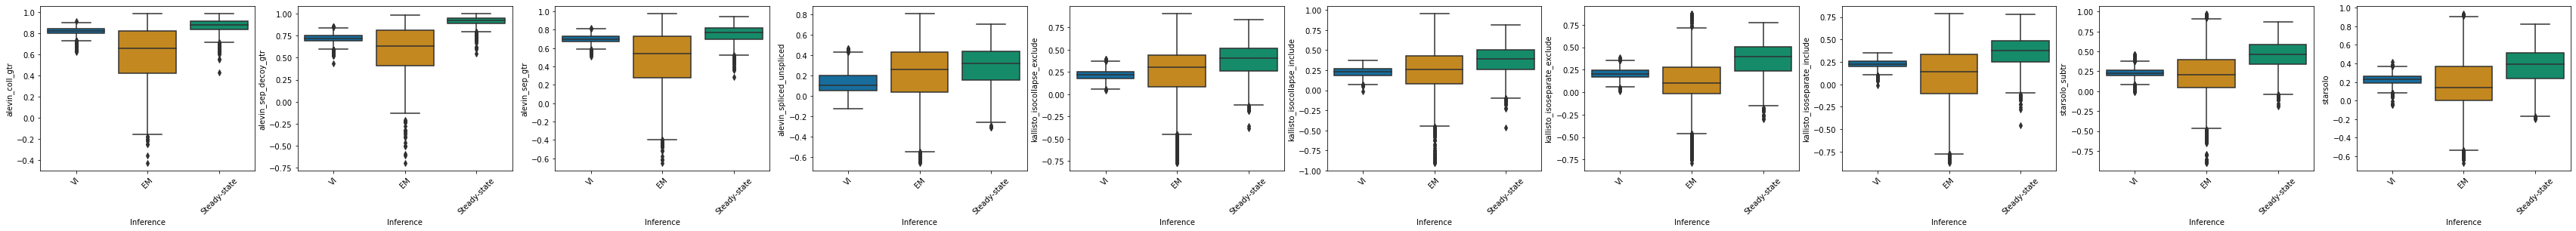

In [11]:
df_velovi = corr_velovi[PROTOCOLS[0]]
df_velovi['Inference'] = 'VI'

df_em = corr_em[PROTOCOLS[0]]
df_em['Inference'] = 'EM'

df_steady_state = corr_steady_state[PROTOCOLS[0]]
df_steady_state['Inference'] = 'Steady-state'

combined_corr[PROTOCOLS[0]] = pd.concat([df_velovi, df_em, df_steady_state])

fig, ax = plt.subplots(ncols=combined_corr[PROTOCOLS[0]].shape[1] - 1, figsize=((combined_corr[PROTOCOLS[0]].shape[1] - 1) * 6, 4))
for col_id, col in enumerate(combined_corr[PROTOCOLS[0]].columns[:-1]):
    sns.boxplot(x='Inference', y=col, data=combined_corr[PROTOCOLS[0]], palette='colorblind', ax=ax[col_id])
    ax[col_id].set_xticklabels(ax[col_id].get_xticklabels(), rotation=45)

### `alevin_coll_gtr`

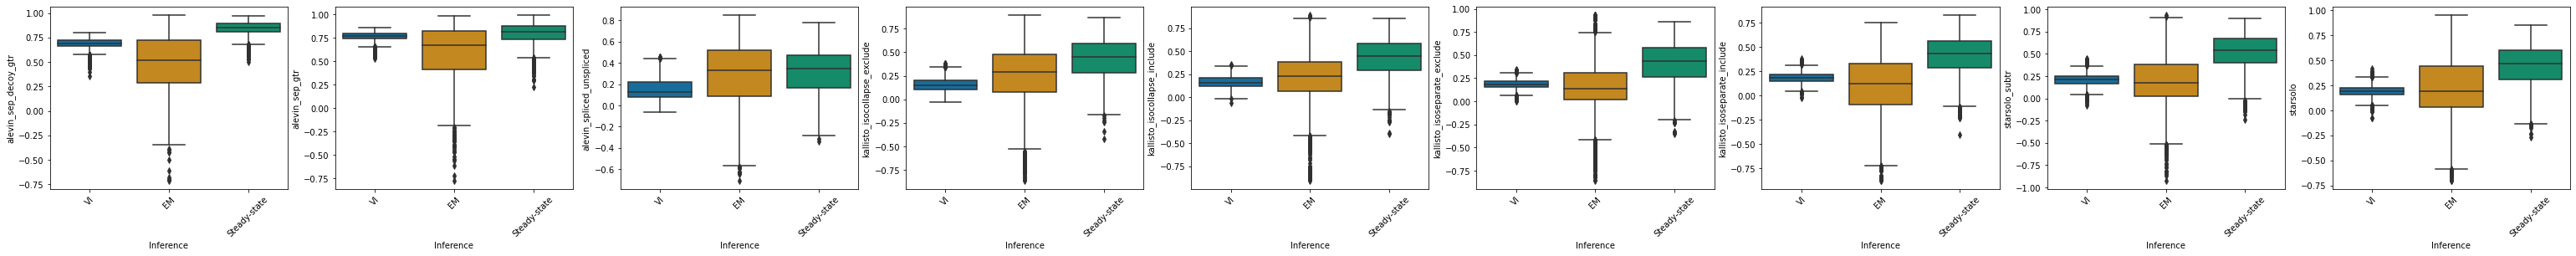

In [12]:
df_velovi = corr_velovi[PROTOCOLS[1]]
df_velovi['Inference'] = 'VI'

df_em = corr_em[PROTOCOLS[1]]
df_em['Inference'] = 'EM'

df_steady_state = corr_steady_state[PROTOCOLS[1]]
df_steady_state['Inference'] = 'Steady-state'

combined_corr[PROTOCOLS[1]] = pd.concat([df_velovi, df_em, df_steady_state])

fig, ax = plt.subplots(ncols=combined_corr[PROTOCOLS[1]].shape[1] - 1, figsize=((combined_corr[PROTOCOLS[1]].shape[1] - 1) * 6, 4))
for col_id, col in enumerate(combined_corr[PROTOCOLS[1]].columns[:-1]):
    sns.boxplot(x='Inference', y=col, data=combined_corr[PROTOCOLS[1]], palette='colorblind', ax=ax[col_id])
    ax[col_id].set_xticklabels(ax[col_id].get_xticklabels(), rotation=45)

### `alevin_sep_decoy_gtr`

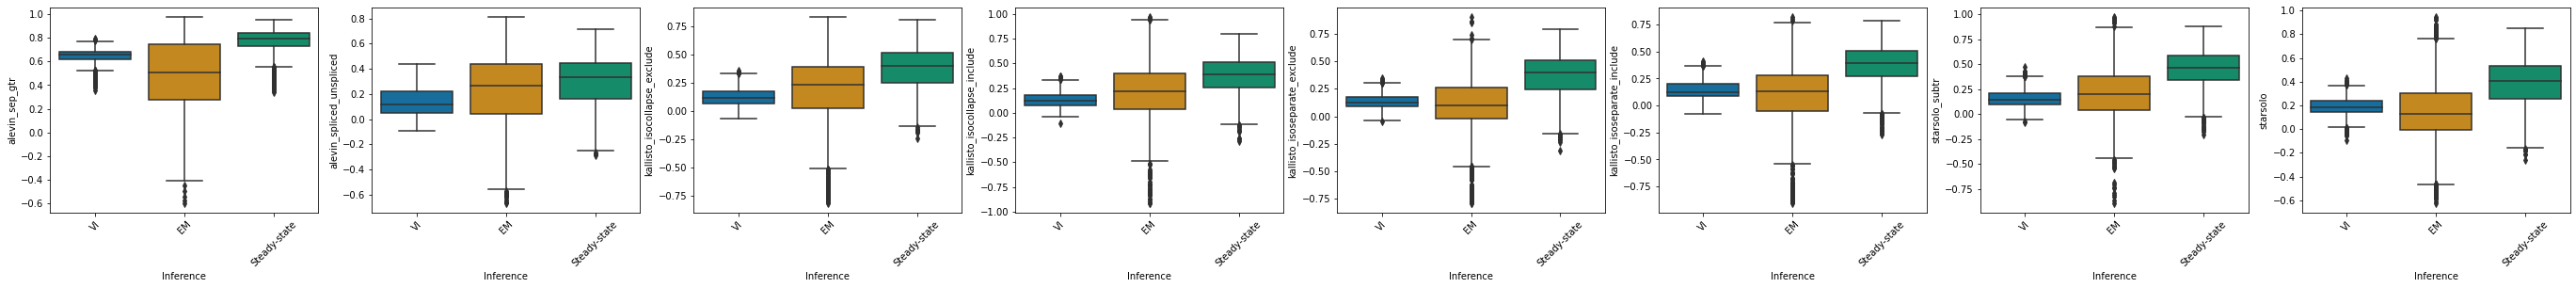

In [13]:
df_velovi = corr_velovi[PROTOCOLS[2]]
df_velovi['Inference'] = 'VI'

df_em = corr_em[PROTOCOLS[2]]
df_em['Inference'] = 'EM'

df_steady_state = corr_steady_state[PROTOCOLS[2]]
df_steady_state['Inference'] = 'Steady-state'

combined_corr[PROTOCOLS[2]] = pd.concat([df_velovi, df_em, df_steady_state])

fig, ax = plt.subplots(ncols=combined_corr[PROTOCOLS[2]].shape[1] - 1, figsize=((combined_corr[PROTOCOLS[2]].shape[1] - 1) * 6, 4))
for col_id, col in enumerate(combined_corr[PROTOCOLS[2]].columns[:-1]):
    sns.boxplot(x='Inference', y=col, data=combined_corr[PROTOCOLS[2]], palette='colorblind', ax=ax[col_id])
    ax[col_id].set_xticklabels(ax[col_id].get_xticklabels(), rotation=45)

### `alevin_sep_gtr`

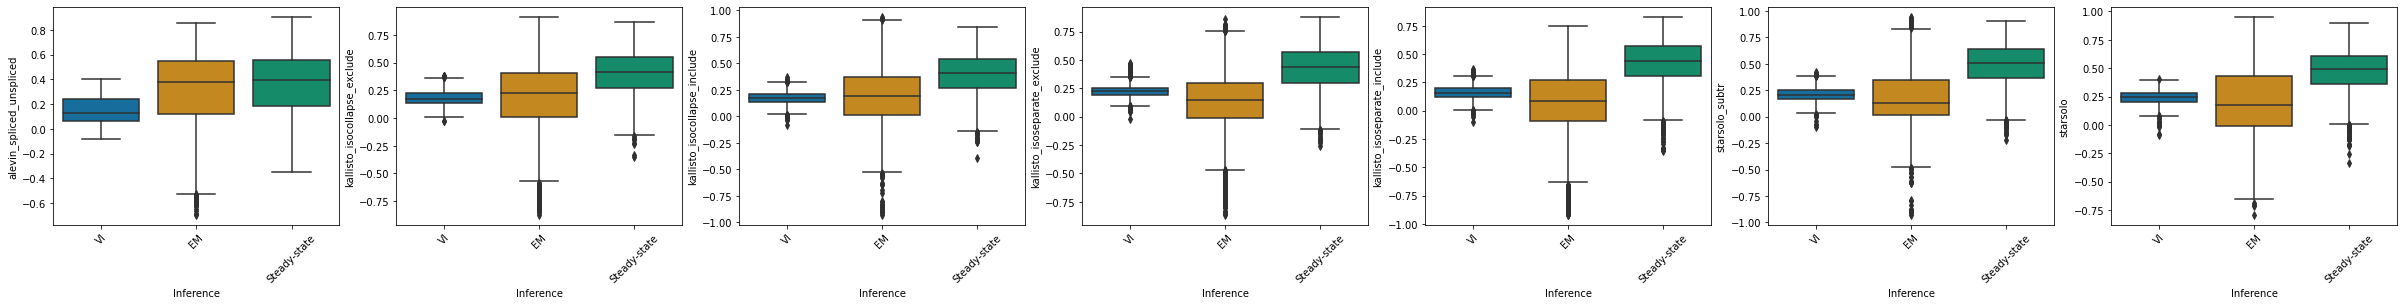

In [14]:
df_velovi = corr_velovi[PROTOCOLS[3]]
df_velovi['Inference'] = 'VI'

df_em = corr_em[PROTOCOLS[3]]
df_em['Inference'] = 'EM'

df_steady_state = corr_steady_state[PROTOCOLS[3]]
df_steady_state['Inference'] = 'Steady-state'

combined_corr[PROTOCOLS[3]] = pd.concat([df_velovi, df_em, df_steady_state])

fig, ax = plt.subplots(ncols=combined_corr[PROTOCOLS[3]].shape[1] - 1, figsize=((combined_corr[PROTOCOLS[3]].shape[1] - 1) * 6, 4))
for col_id, col in enumerate(combined_corr[PROTOCOLS[3]].columns[:-1]):
    sns.boxplot(x='Inference', y=col, data=combined_corr[PROTOCOLS[3]], palette='colorblind', ax=ax[col_id])
    ax[col_id].set_xticklabels(ax[col_id].get_xticklabels(), rotation=45)

### `alevin_spliced_unspliced`

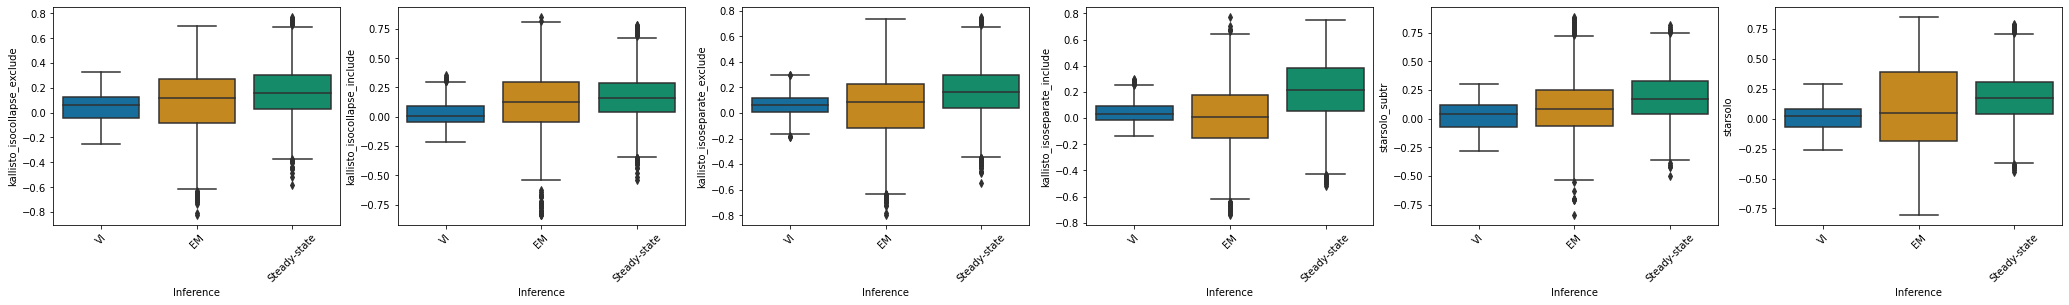

In [15]:
df_velovi = corr_velovi[PROTOCOLS[4]]
df_velovi['Inference'] = 'VI'

df_em = corr_em[PROTOCOLS[4]]
df_em['Inference'] = 'EM'

df_steady_state = corr_steady_state[PROTOCOLS[4]]
df_steady_state['Inference'] = 'Steady-state'

combined_corr[PROTOCOLS[4]] = pd.concat([df_velovi, df_em, df_steady_state])

fig, ax = plt.subplots(ncols=combined_corr[PROTOCOLS[4]].shape[1] - 1, figsize=((combined_corr[PROTOCOLS[4]].shape[1] - 1) * 6, 4))
for col_id, col in enumerate(combined_corr[PROTOCOLS[4]].columns[:-1]):
    sns.boxplot(x='Inference', y=col, data=combined_corr[PROTOCOLS[4]], palette='colorblind', ax=ax[col_id])
    ax[col_id].set_xticklabels(ax[col_id].get_xticklabels(), rotation=45)

### `kallisto_isocollapse_exclude`

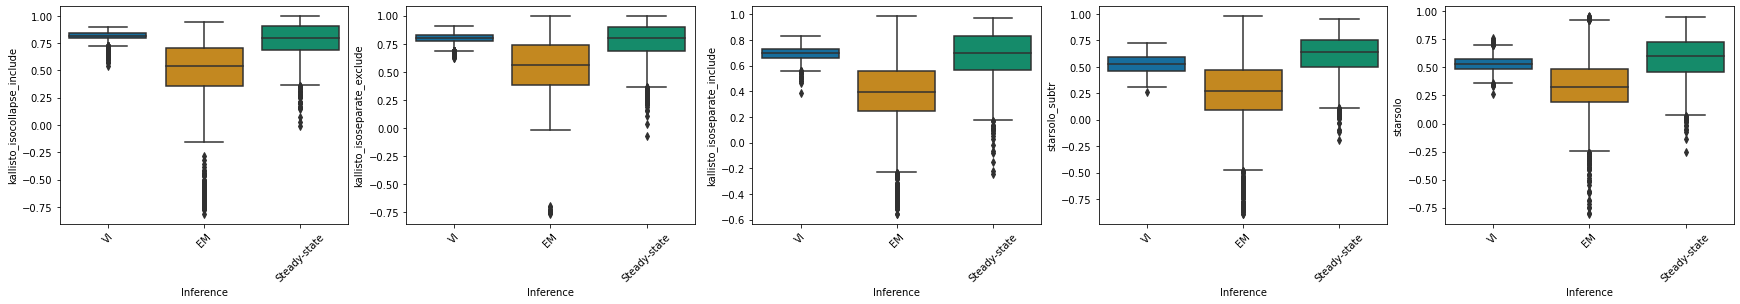

In [16]:
df_velovi = corr_velovi[PROTOCOLS[5]]
df_velovi['Inference'] = 'VI'

df_em = corr_em[PROTOCOLS[5]]
df_em['Inference'] = 'EM'

df_steady_state = corr_steady_state[PROTOCOLS[5]]
df_steady_state['Inference'] = 'Steady-state'

combined_corr[PROTOCOLS[5]] = pd.concat([df_velovi, df_em, df_steady_state])

fig, ax = plt.subplots(ncols=combined_corr[PROTOCOLS[5]].shape[1] - 1, figsize=((combined_corr[PROTOCOLS[5]].shape[1] - 1) * 6, 4))
for col_id, col in enumerate(combined_corr[PROTOCOLS[5]].columns[:-1]):
    sns.boxplot(x='Inference', y=col, data=combined_corr[PROTOCOLS[5]], palette='colorblind', ax=ax[col_id])
    ax[col_id].set_xticklabels(ax[col_id].get_xticklabels(), rotation=45)

### `kallisto_isocollapse_include`

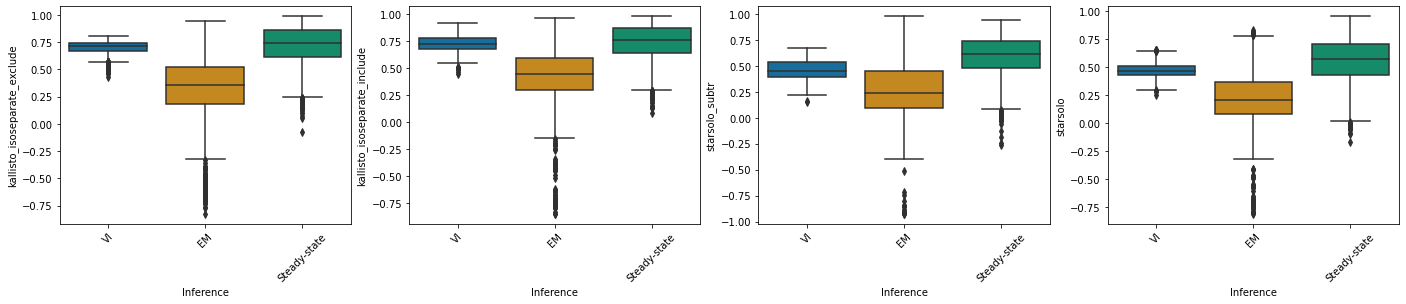

In [17]:
df_velovi = corr_velovi[PROTOCOLS[6]]
df_velovi['Inference'] = 'VI'

df_em = corr_em[PROTOCOLS[6]]
df_em['Inference'] = 'EM'

df_steady_state = corr_steady_state[PROTOCOLS[6]]
df_steady_state['Inference'] = 'Steady-state'

combined_corr[PROTOCOLS[6]] = pd.concat([df_velovi, df_em, df_steady_state])

fig, ax = plt.subplots(ncols=combined_corr[PROTOCOLS[6]].shape[1] - 1, figsize=((combined_corr[PROTOCOLS[6]].shape[1] - 1) * 6, 4))
for col_id, col in enumerate(combined_corr[PROTOCOLS[6]].columns[:-1]):
    sns.boxplot(x='Inference', y=col, data=combined_corr[PROTOCOLS[6]], palette='colorblind', ax=ax[col_id])
    ax[col_id].set_xticklabels(ax[col_id].get_xticklabels(), rotation=45)

### `kallisto_isoseparate_exclude`

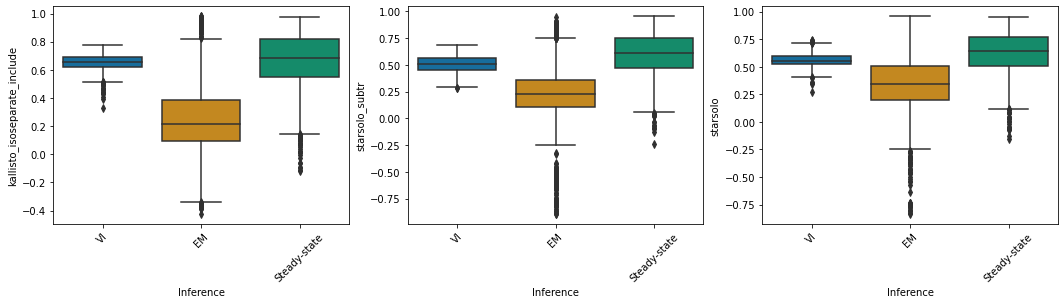

In [18]:
df_velovi = corr_velovi[PROTOCOLS[7]]
df_velovi['Inference'] = 'VI'

df_em = corr_em[PROTOCOLS[7]]
df_em['Inference'] = 'EM'

df_steady_state = corr_steady_state[PROTOCOLS[7]]
df_steady_state['Inference'] = 'Steady-state'

combined_corr[PROTOCOLS[7]] = pd.concat([df_velovi, df_em, df_steady_state])

fig, ax = plt.subplots(ncols=combined_corr[PROTOCOLS[7]].shape[1] - 1, figsize=((combined_corr[PROTOCOLS[7]].shape[1] - 1) * 6, 4))
for col_id, col in enumerate(combined_corr[PROTOCOLS[7]].columns[:-1]):
    sns.boxplot(x='Inference', y=col, data=combined_corr[PROTOCOLS[7]], palette='colorblind', ax=ax[col_id])
    ax[col_id].set_xticklabels(ax[col_id].get_xticklabels(), rotation=45)

### `kallisto_isoseparate_include`

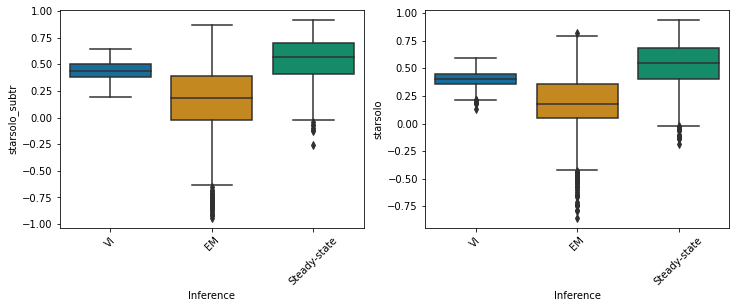

In [19]:
df_velovi = corr_velovi[PROTOCOLS[8]]
df_velovi['Inference'] = 'VI'

df_em = corr_em[PROTOCOLS[8]]
df_em['Inference'] = 'EM'

df_steady_state = corr_steady_state[PROTOCOLS[8]]
df_steady_state['Inference'] = 'Steady-state'

combined_corr[PROTOCOLS[8]] = pd.concat([df_velovi, df_em, df_steady_state])

fig, ax = plt.subplots(ncols=combined_corr[PROTOCOLS[8]].shape[1] - 1, figsize=((combined_corr[PROTOCOLS[8]].shape[1] - 1) * 6, 4))
for col_id, col in enumerate(combined_corr[PROTOCOLS[8]].columns[:-1]):
    sns.boxplot(x='Inference', y=col, data=combined_corr[PROTOCOLS[8]], palette='colorblind', ax=ax[col_id])
    ax[col_id].set_xticklabels(ax[col_id].get_xticklabels(), rotation=45)

### `starsolo_subtr`

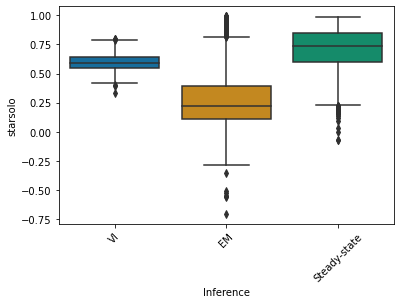

In [20]:
df_velovi = corr_velovi[PROTOCOLS[9]]
df_velovi['Inference'] = 'VI'

df_em = corr_em[PROTOCOLS[9]]
df_em['Inference'] = 'EM'

df_steady_state = corr_steady_state[PROTOCOLS[9]]
df_steady_state['Inference'] = 'Steady-state'

combined_corr[PROTOCOLS[9]] = pd.concat([df_velovi, df_em, df_steady_state])

fig, ax = plt.subplots(ncols=combined_corr[PROTOCOLS[9]].shape[1] - 1, figsize=((combined_corr[PROTOCOLS[9]].shape[1] - 1) * 6, 4))
for col_id, col in enumerate(combined_corr[PROTOCOLS[9]].columns[:-1]):
    sns.boxplot(x='Inference', y=col, data=combined_corr[PROTOCOLS[9]], palette='colorblind', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

## Summary figures

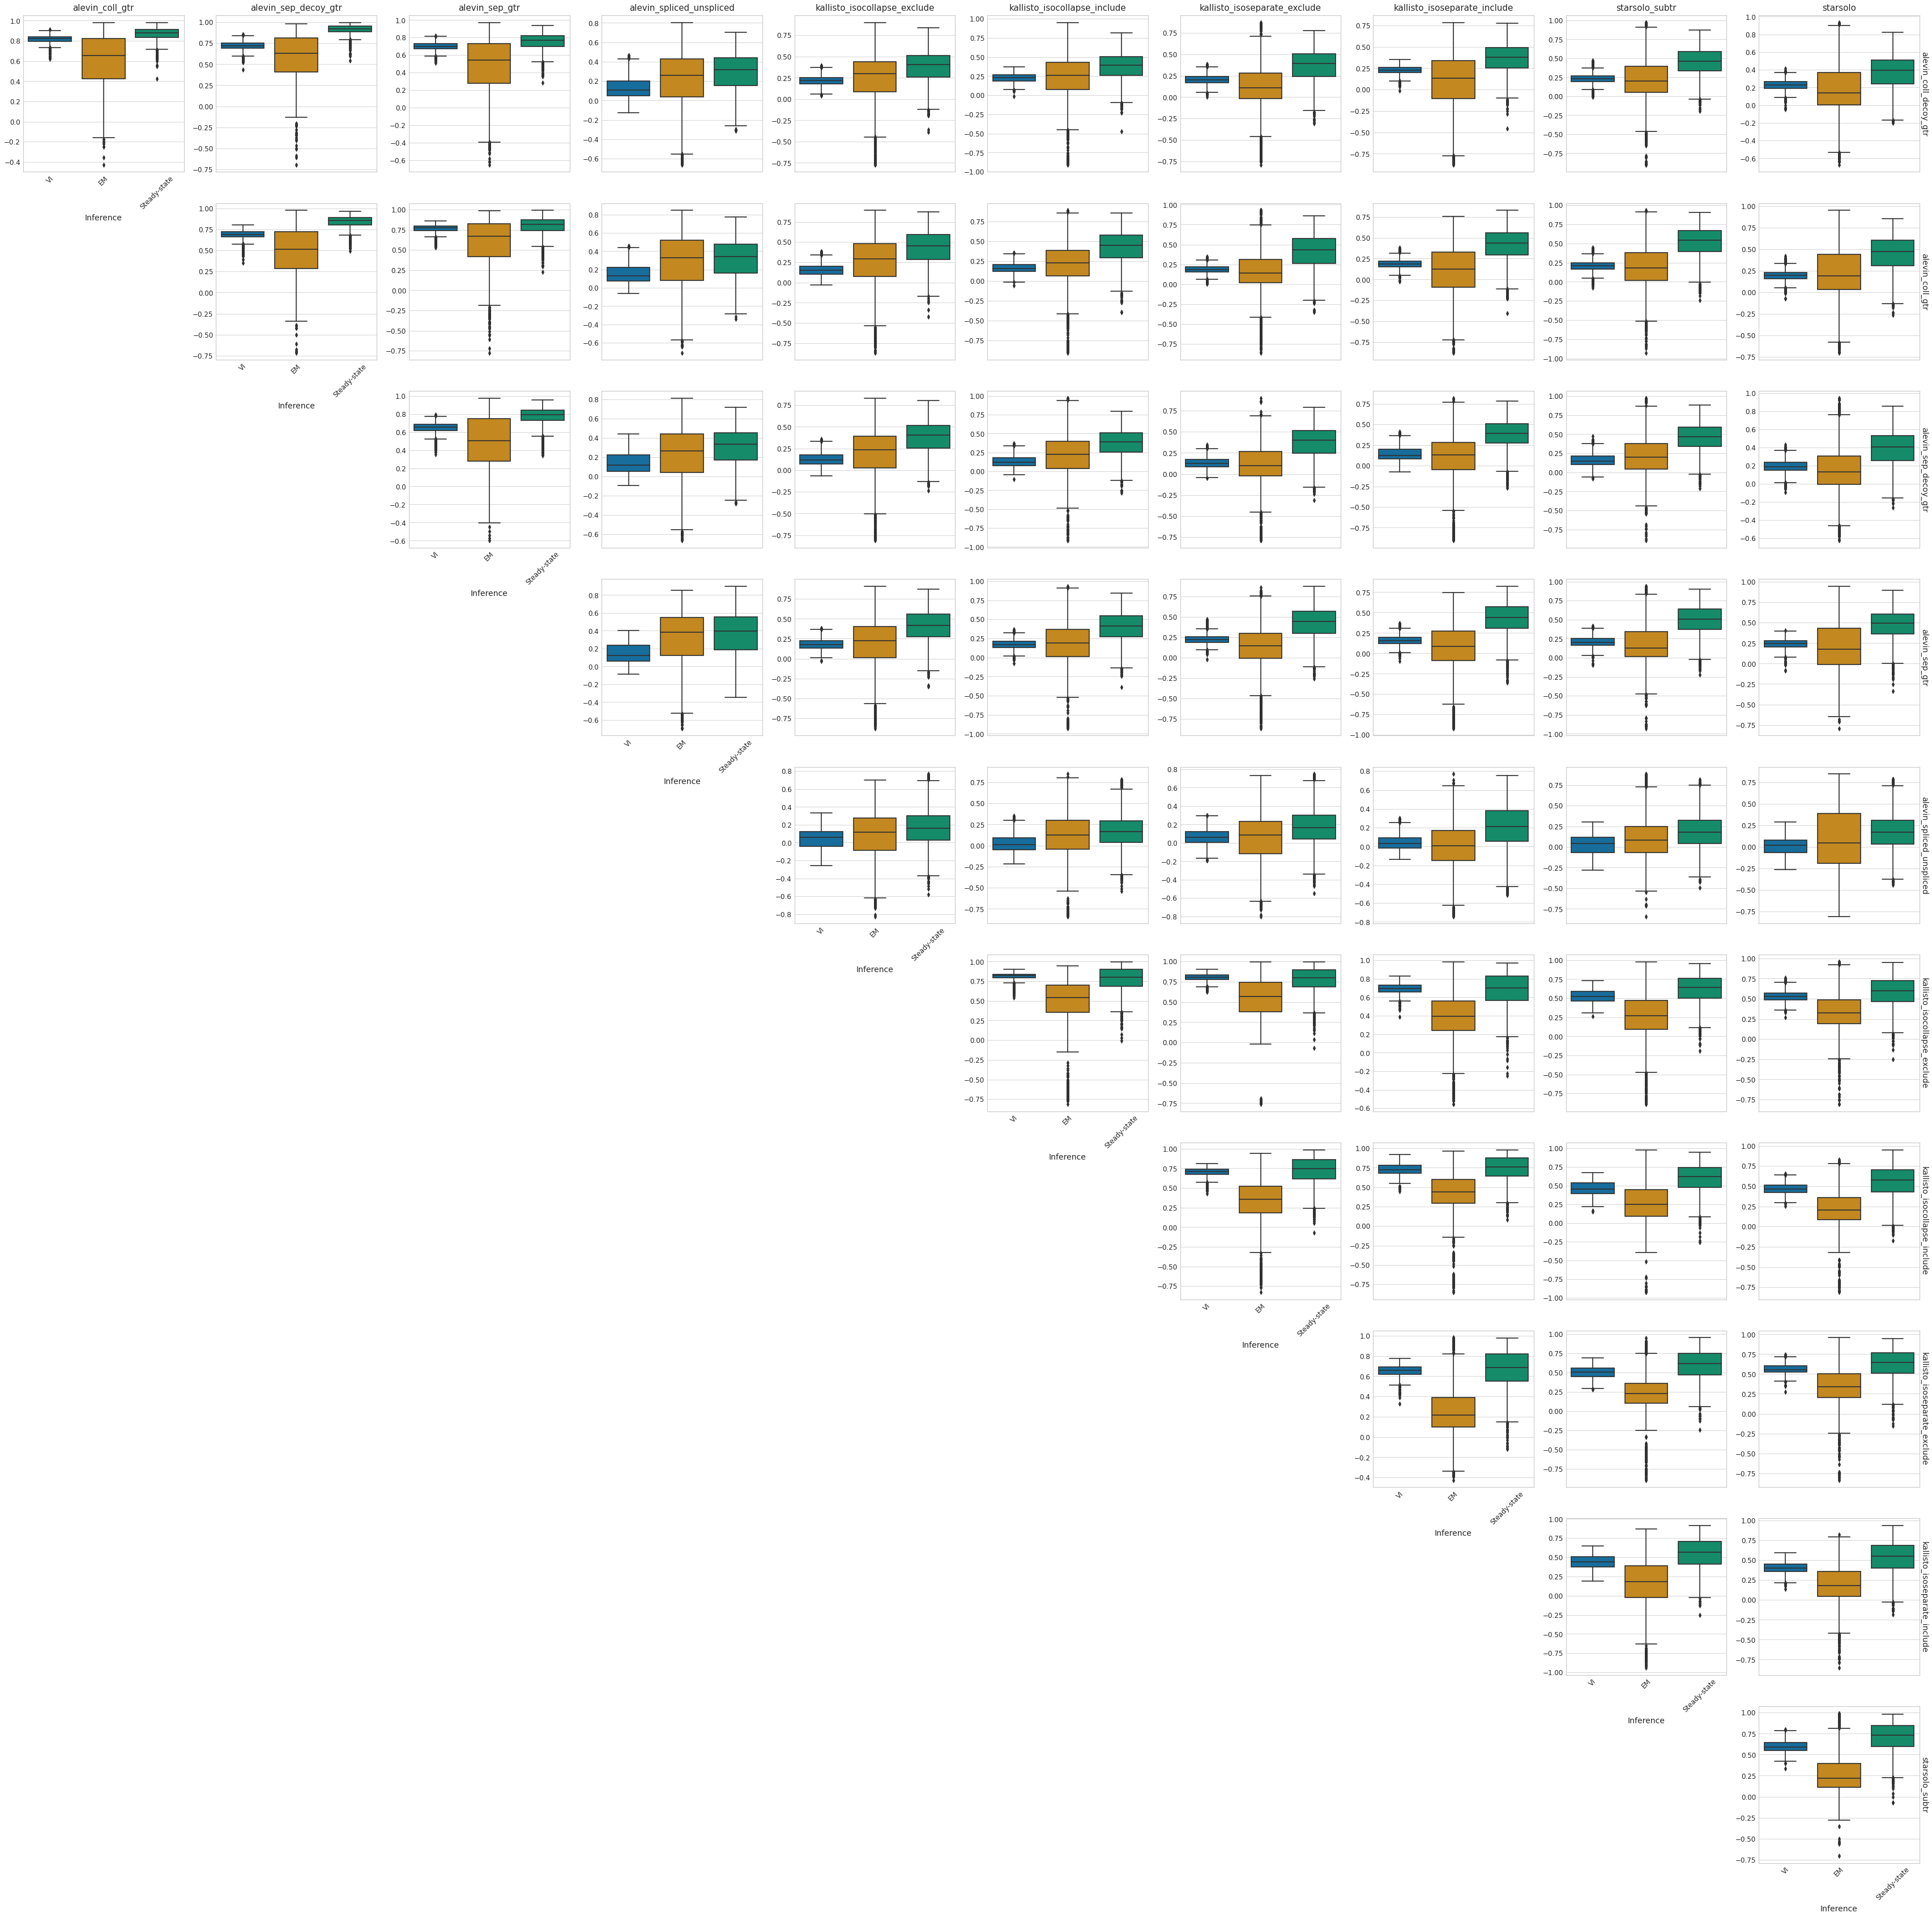

In [21]:
with mplscience.style_context():
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(nrows=len(PROTOCOLS[:-1]), ncols=len(PROTOCOLS[:-1]), figsize=(len(PROTOCOLS[:-1]) * 6, len(PROTOCOLS[:-1]) * 6))
    for row_id, ref_protocol in enumerate(PROTOCOLS[:-1]):
        for col_id, protocol in enumerate(combined_corr[ref_protocol].columns[:-1]):
            df = combined_corr[ref_protocol]

            sns.boxplot(x='Inference', y=protocol, data=df, palette='colorblind', ax=ax[row_id, row_id + col_id])
            if col_id == 0:
                ax[row_id, row_id + col_id].set_xticklabels(ax[row_id, row_id + col_id].get_xticklabels(), rotation=45)
            if col_id > 0:
                ax[row_id, row_id + col_id].set_xlabel('')
                ax[row_id, row_id + col_id].set_xticklabels([])
            ax[row_id, row_id + col_id].set_ylabel('')

            if row_id == 0:
                ax[row_id, row_id + col_id].set_title(protocol)
            ax[row_id, len(PROTOCOLS[:-1]) - 1].yaxis.set_label_position("right")
            ax[row_id, len(PROTOCOLS[:-1]) - 1].set_ylabel(ref_protocol, rotation=270, labelpad=15)

        for col_id in range(len(PROTOCOLS[:-1])):
            if col_id < row_id:
                ax[row_id, col_id].axis('off')

if SAVE_FIGURES:
    fig.savefig(FIG_DIR / 'comparison' / "preprocessing_dentategyrus.pdf", bbox_inches="tight", dpi=300);
    fig.savefig(FIG_DIR / 'comparison' / "preprocessing_dentategyrus.svg", bbox_inches="tight", format='svg')

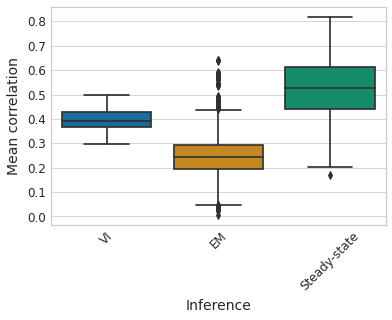

In [22]:
agg_corr = pd.DataFrame(
    combined_corr[PROTOCOLS[0]].iloc[:, :-1].mean(axis=1),
    columns=[PROTOCOLS[0]]
)
for ref_protocol in PROTOCOLS[1:-1]:
    agg_corr = pd.concat(
        [
            agg_corr, 
            pd.DataFrame(
                combined_corr[ref_protocol].iloc[:, :-1].mean(axis=1),
                columns=[ref_protocol]
            )
        ],
        axis=1
    )

agg_corr = pd.DataFrame(
    {
        'Mean correlation': agg_corr.mean(axis=1).values,
        'Inference': combined_corr[PROTOCOLS[0]]['Inference'].values
    }
)

with mplscience.style_context():
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.boxplot(x='Inference', y='Mean correlation', data=agg_corr, palette='colorblind', ax=ax);
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

if SAVE_FIGURES:
    fig.savefig(
        FIG_DIR / 'comparison' / "preprocessing_dentategyrus_aggregated.pdf",
        bbox_inches="tight",
        dpi=300
    )
    fig.savefig(
        FIG_DIR / 'comparison' / "preprocessing_dentategyrus_aggregated.svg",
        bbox_inches="tight",
        format='svg'
    )